# Computational Methods in Ordinary Differential Equations

*Dr Jon Shiach, Department of Computing and Mathematics, Manchester Metropolitan University*

---
# Initial Value Problems

An [**Initial Value Problem**](https://en.wikipedia.org/wiki/Initial_value_problem) (IVP) is written as an [Ordinary Differential Equation](https://en.wikipedia.org/wiki/Ordinary_dif) (ODE) where the initial solution at the lower boundary of the domain is known. For example,

\begin{align*}
    y' &= f(t, y), & t &\in [t_{\min}, t_{\max}], & y(t_{\min}) &= y_0.
\end{align*}

Here a first-order ODE $y'=f(t,y)$ is defined over the domain $t\in [t_{\min}, t_{\max}]$ and the initial solution $y(t_{\min})$ is the known value $y_0$. 

In most real world practical applications, IVPs cannot be solved using analytical methods so instead we use computational methods called **ODE solvers** to approximate the solutions. The simplest ODE solver is the Euler method.

## The Euler Method
The [**Euler method**](https://en.wikipedia.org/wiki/Euler_method) for solving the first-order Ordinary Differential Equation (ODE) can be derived very easily by truncating the [Taylor series](https://en.wikipedia.org/wiki/Taylor_series) after the first-order term

\begin{equation}
    y_{n+1} = y_n + hf(t_n, y_n),
\end{equation}

where the subscript notation used is $y_{n+1} = y(t + h)$, $y_n = y(t_n)$.



To apply the Euler method to solve an IVP we loop through the domain and calculate the values of $y_{n+1}$ using the Euler method with the known values $t_{n}$ and $y_n$. 

The code below defines a function `euler` that solves an IVP where `tspan` is a two element array containing the lower and upper bounds of the $t$ domain, `y0` is the value of $y$ at the lower bound and `h` is the step length.

In [1]:
import numpy as np


def euler(f, tspan, y0, h):

    nsteps = int((tspan[1] - tspan[0]) / h)
    t = np.zeros(nsteps + 1)
    y = np.zeros(nsteps + 1)
    t[0] = tspan[0]
    y[0] = y0
    
    for n in range(nsteps):
        y[n+1] = y[n] + h * f(t[n], y[n])
        t[n+1] = t[n] + h
    
    return t, y

#### Example 1
Use the Euler method to calculate the solution to the IVP

$$ y' = y \sin^2(t), \qquad t \in [0, 5], \qquad y_0 = 1,$$

using a step length $h=0.5$.

The function below defines $f(t,y)$ for this ODE.

In [2]:
def f(t, y):
    return y * np.sin(t)**2

The program below invokes the Euler method to solve this IVP.

In [4]:
# Define IVP parameters
tspan = [0, 5]
y0 = 1
h = 0.5

# Invoke the Euler method to solve IVP
t, y = euler(f, tspan, y0, h)

# Output solution table
hline = '-' * 16
print(hline + '\n  t  |    y \n' + hline)
for i in range(len(t)):
    print(' {:0.1f} | {:8.6f}'.format(t[i], y[i]))
print(hline)

----------------
  t  |    y 
----------------
 0.0 | 1.000000
 0.5 | 1.000000
 1.0 | 1.114924
 1.5 | 1.509649
 2.0 | 2.260696
 2.5 | 3.195292
 3.0 | 3.767519
 3.5 | 3.805034
 4.0 | 4.039137
 4.5 | 5.195845
 5.0 | 7.678329
----------------


The exact solution to this IVP is $y(t) = e^{\frac{1}{2}(t - \sin(t)\cos(t)}$ and defined by the function below.

In [3]:
def exact_sol(t):
    return np.exp(0.5 * (t - np.sin(t) * np.cos(t)))

The code below plots the numerical solution obtained using the Euler method against the exact solution.

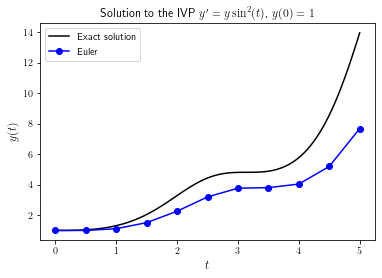

In [8]:
import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=True)

# Calculate exact solution
t1 = np.linspace(tspan[0], tspan[1], 100)
y1 = exact_sol(t1)

# Plot exact solution and numerical solution
fig, ax = plt.subplots()

ax.plot(t1, y1, 'k-', label='Exact solution')
ax.plot(t, y, 'bo-', label='Euler')

ax.set_title("Solution to the IVP $y'=y\sin^2(t)$, $y(0) = 1$")
ax.set_xlabel('$t$', fontsize=12)
ax.set_ylabel('$y(t)$', fontsize=12)
ax.legend()

plt.show()

Here we can see that the solution using the Euler method deviates from the exact solution. This is because the Euler method is a first-order method and the truncation errors at each step compound as we step through the solution. One way to improve our solution is to use a smaller step length.


#### Example 2
Repeat the solution of the IVP in [example 1](#Example-1) using a step length of $h=0.1$.

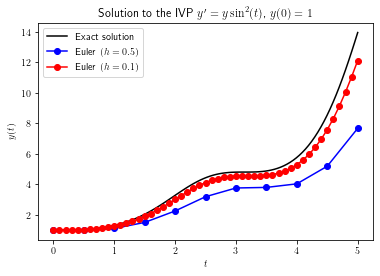

In [11]:
# Invoke the Euler method to solve IVP using a smaller step length
h = 0.1
t2, y2 = euler(f, tspan, y0, h)

# Plot numerical and exact solutions
fig, ax = plt.subplots()

ax.plot(t1, y1, 'k-', label='Exact solution')
ax.plot(t, y, 'bo-', label='Euler $(h=0.5)$')
ax.plot(t2, y2, 'ro-', label='Euler $(h=0.1)$')

ax.set_title("Solution to the IVP $y'=y\sin^2(t)$, $y(0) = 1$")
ax.set_xlabel('$t$')
ax.set_ylabel('$y(t)$')
ax.legend()

plt.show()

Here we can see that although using a smaller step length has increased the accuracy of the solution it still isn't quite right. The Euler method is easy to derive and apply but is not very accurate. 

The derivation of more accurate methods is covered in [Runge-Kutta methods](runge_kutta_methods.ipynb).